<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Read-file" data-toc-modified-id="Read-file-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read file</a></span></li><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data wrangling</a></span><ul class="toc-item"><li><span><a href="#Step-by-step" data-toc-modified-id="Step-by-step-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Step by step</a></span></li><li><span><a href="#All-in-one" data-toc-modified-id="All-in-one-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>All in one</a></span></li></ul></li><li><span><a href="#Graphs" data-toc-modified-id="Graphs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Graphs</a></span><ul class="toc-item"><li><span><a href="#Spoiler" data-toc-modified-id="Spoiler-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Spoiler</a></span></li><li><span><a href="#All-greedy-/-instances-names" data-toc-modified-id="All-greedy-/-instances-names-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>All greedy / instances names</a></span></li><li><span><a href="#All-Descente-/-instances-names" data-toc-modified-id="All-Descente-/-instances-names-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>All Descente / instances names</a></span></li><li><span><a href="#Taboo-+-best-descent-/-instances-names" data-toc-modified-id="Taboo-+-best-descent-/-instances-names-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Taboo + best descent / instances names</a></span></li><li><span><a href="#Best-solver-/-instances-names" data-toc-modified-id="Best-solver-/-instances-names-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Best solver / instances names</a></span></li><li><span><a href="#SPT-glouton-SPT-descente-/-instances-names" data-toc-modified-id="SPT-glouton-SPT-descente-/-instances-names-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>SPT glouton SPT descente / instances names</a></span></li><li><span><a href="#LRPT-glouton-LRPT-descente-/-instances-names" data-toc-modified-id="LRPT-glouton-LRPT-descente-/-instances-names-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>LRPT glouton LRPT descente / instances names</a></span></li><li><span><a href="#EST_LRPT-glouton-EST_LRPT-descente-/-instances-names" data-toc-modified-id="EST_LRPT-glouton-EST_LRPT-descente-/-instances-names-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>EST_LRPT glouton EST_LRPT descente / instances names</a></span></li><li><span><a href="#EST_SPT-glouton-EST_SPT-descente-/-instances-names" data-toc-modified-id="EST_SPT-glouton-EST_SPT-descente-/-instances-names-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>EST_SPT glouton EST_SPT descente / instances names</a></span></li><li><span><a href="#All-solver-/-instances-names" data-toc-modified-id="All-solver-/-instances-names-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>All solver / instances names</a></span></li><li><span><a href="#All-solver-/-instances-sizes" data-toc-modified-id="All-solver-/-instances-sizes-5.11"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>All solver / instances sizes</a></span></li></ul></li></ul></div>

# Import 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

# Functions

In [319]:
def split_space(s):
    return " ".join(s.split()).split(' ')


def read_file(path):
    with open(path) as fp:
        lines = fp.readlines()
    return lines


def get_data(data):
    solvers = split_space(data[0])
    instances = [split_space(i)[0] for i in data[2:-1]]
    sizes = [split_space(i)[1] for i in data[2:-1]]
    best_makespan = [split_space(i)[2] for i in data[2:-1]]
    runtimes = np.array([split_space(i)[3::3] for i in data[2:-1]])
    makespan = np.array([split_space(i)[4::3] for i in data[2:-1]])
    ecart = np.array([split_space(i)[5::3] for i in data[2:-1]])
    return solvers, instances, sizes, best_makespan, runtimes, makespan, ecart


def convert_df(solvers, instances, sizes, best_makespan, runtimes, makespan, ecart):
    df_instances = []
    df_sizes = []
    df_best_makespan = []
    df_solver = []
    df_runtimes = []
    df_makespan = []
    df_ecart = []

    for i in range(len(lines)-3):
        for index_sol, solver in enumerate(solvers):
#             print(instances[i],sizes[i],best_makespan[i],solver,runtimes[i,index_sol],makespan[i,index_sol],ecart[i,index_sol])
            df_instances.append(instances[i])
            df_sizes.append(sizes[i])
            df_best_makespan.append(best_makespan[i])
            df_solver.append(solver)
            df_runtimes.append(runtimes[i, index_sol])
            df_makespan.append(makespan[i, index_sol])
            df_ecart.append(ecart[i, index_sol])

    df = pd.DataFrame(list(zip(df_instances, df_sizes, df_best_makespan, df_solver, df_runtimes, df_makespan, df_ecart)),
                      columns=["instances", "sizes", "best_makespan", "solver", "runtimes", "makespan", "ecart"])

    df_best = pd.DataFrame(columns=list(df.columns))

    df_best.instances = instances
    df_best.sizes = sizes
    df_best.best_makespan = best_makespan
    df_best.solver = "best"
    df_best.runtimes = 0
    df_best.makespan = best_makespan
    df_best.ecart = 0
    df_best

    df = pd.concat([df, df_best])
    df = df.sort_values("instances")
    df['taille_instance']=df.sizes.apply(lambda x: int(x.split("x")[0])*int(x.split("x")[1]))
    df.makespan=pd.to_numeric(df.makespan)
    df.best_makespan=pd.to_numeric(df.best_makespan)
    df.runtimes=pd.to_numeric(df.runtimes)
    df.ecart=pd.to_numeric(df.ecart)
    
    return df

# Read file

In [379]:
# file="../data/benchmark_full.txt"
file="../data/benchmark.txt"

# file="/home/prembamrung/Documents/test/Metaheuristiques/benchmark_all_instances.txt"
file="../data/SPOILER_spoiler-glouton.txt"
with open(file) as fp:
    lines = fp.readlines()

# Data wrangling

## Step by step

In [380]:
solvers=split_space(lines[0])
instances=[split_space(i)[0] for i in lines[2:-1]]
sizes=[split_space(i)[1] for i in lines[2:-1]]
best_makespan=[split_space(i)[2] for i in lines[2:-1]]
runtimes=np.array([split_space(i)[3::3] for i in lines[2:-1]])
makespan=np.array([split_space(i)[4::3] for i in lines[2:-1]])
ecart=np.array([split_space(i)[5::3] for i in lines[2:-1]])


In [381]:
df_instances=[]
df_sizes=[]
df_best_makespan=[]
df_solver=[]
df_runtimes=[]
df_makespan=[]
df_ecart=[]

for i in range(len(lines)-3):
    for index_sol,solver in enumerate(solvers):
#         print(instances[i],sizes[i],best_makespan[i],solver,runtimes[i,index_sol],makespan[i,index_sol],ecart[i,index_sol])
        df_instances.append(instances[i])
        df_sizes.append(sizes[i])
        df_best_makespan.append(best_makespan[i])
        df_solver.append(solver)
        df_runtimes.append(runtimes[i,index_sol])
        df_makespan.append(makespan[i,index_sol])
        df_ecart.append(ecart[i,index_sol])

In [382]:
df = pd.DataFrame(list(zip(df_instances,df_sizes,df_best_makespan,df_solver,df_runtimes,df_makespan,df_ecart)), 
               columns =["instances","sizes","best_makespan","solver","runtimes","makespan","ecart"]) 

df_best=pd.DataFrame(columns=list(df.columns))

df_best.instances=instances
df_best.sizes=sizes
df_best.best_makespan=best_makespan
df_best.solver="best"
df_best.runtimes=0
df_best.makespan=best_makespan
df_best.ecart=0
df_best

df=pd.concat([df,df_best])
df=df.sort_values("instances")
df

instances  sizes best_makespan    solver runtimes makespan  ecart
0       aaa1    2x3            11       spt        6       16   45.5
1       aaa1    2x3            11       lpt        0       16   45.5
2       aaa1    2x3            11      srpt        2       12    9.1
3       aaa1    2x3            11      lrpt        0       11    0.0
4       aaa1    2x3            11   est_spt        0       11    0.0
5       aaa1    2x3            11   est_lpt        0       11    0.0
6       aaa1    2x3            11  est_srpt        0       11    0.0
7       aaa1    2x3            11  est_lrpt        0       11    0.0
0       aaa1    2x3            11      best        0       11      0
1       ft06    6x6            55      best        0       55      0
15      ft06    6x6            55  est_lrpt        2       61   10.9
14      ft06    6x6            55  est_srpt        2       70   27.3
13      ft06    6x6            55   est_lpt        1       75   36.4
10      ft06    6x6            55      srpt        3      154  180.0
11      ft06    6x6            55      lrpt        4       74   34.5
9       ft06    6x6            55       lpt        1      141  156.4
8       ft06    6x6            55       spt        1      109   98.2
12      ft06    6x6            55   est_spt        1       88   60.0
22      ft10  10x10           930  est_srpt        1     1334   43.4
23      ft10  10x10           930  est_lrpt        1     1108   19.1
21      ft10  10x10           930   est_lpt        1     1295   39.2
17      ft10  10x10           930       lpt        1     2949  217.1
19      ft10  10x10           930      lrpt        5     1289   38.6
18      ft10  10x10           930      srpt        6     2657  185.7
2       ft10  10x10           930      best        0      930      0
16      ft10  10x10           930       spt        1     2872  208.8
20      ft10  10x10           930   est_spt        2     1074   15.5
24      ft20   20x5          1165       spt        1     3167  171.8
25      ft20   20x5          1165       lpt        1     2581  121.5
26      ft20   20x5          1165      srpt        1     2986  156.3
27      ft20   20x5          1165      lrpt        3     1995   71.2
28      ft20   20x5          1165   est_spt        1     1267    8.8
29      ft20   20x5          1165   est_lpt        1     1621   39.1
30      ft20   20x5          1165  est_srpt        1     1392   19.5
31      ft20   20x5          1165  est_lrpt        1     1501   28.8
3       ft20   20x5          1165      best        0     1165      0

In [383]:
df['taille_instance']=df.sizes.apply(lambda x: int(x.split("x")[0])*int(x.split("x")[1]))
df

instances  sizes best_makespan    solver runtimes makespan  ecart  \
0       aaa1    2x3            11       spt        6       16   45.5   
1       aaa1    2x3            11       lpt        0       16   45.5   
2       aaa1    2x3            11      srpt        2       12    9.1   
3       aaa1    2x3            11      lrpt        0       11    0.0   
4       aaa1    2x3            11   est_spt        0       11    0.0   
5       aaa1    2x3            11   est_lpt        0       11    0.0   
6       aaa1    2x3            11  est_srpt        0       11    0.0   
7       aaa1    2x3            11  est_lrpt        0       11    0.0   
0       aaa1    2x3            11      best        0       11      0   
1       ft06    6x6            55      best        0       55      0   
15      ft06    6x6            55  est_lrpt        2       61   10.9   
14      ft06    6x6            55  est_srpt        2       70   27.3   
13      ft06    6x6            55   est_lpt        1       75   36.4   
10      ft06    6x6            55      srpt        3      154  180.0   
11      ft06    6x6            55      lrpt        4       74   34.5   
9       ft06    6x6            55       lpt        1      141  156.4   
8       ft06    6x6            55       spt        1      109   98.2   
12      ft06    6x6            55   est_spt        1       88   60.0   
22      ft10  10x10           930  est_srpt        1     1334   43.4   
23      ft10  10x10           930  est_lrpt        1     1108   19.1   
21      ft10  10x10           930   est_lpt        1     1295   39.2   
17      ft10  10x10           930       lpt        1     2949  217.1   
19      ft10  10x10           930      lrpt        5     1289   38.6   
18      ft10  10x10           930      srpt        6     2657  185.7   
2       ft10  10x10           930      best        0      930      0   
16      ft10  10x10           930       spt        1     2872  208.8   
20      ft10  10x10           930   est_spt        2     1074   15.5   
24      ft20   20x5          1165       spt        1     3167  171.8   
25      ft20   20x5          1165       lpt        1     2581  121.5   
26      ft20   20x5          1165      srpt        1     2986  156.3   
27      ft20   20x5          1165      lrpt        3     1995   71.2   
28      ft20   20x5          1165   est_spt        1     1267    8.8   
29      ft20   20x5          1165   est_lpt        1     1621   39.1   
30      ft20   20x5          1165  est_srpt        1     1392   19.5   
31      ft20   20x5          1165  est_lrpt        1     1501   28.8   
3       ft20   20x5          1165      best        0     1165      0   

    taille_instance  
0                 6  
1                 6  
2                 6  
3                 6  
4                 6  
5                 6  
6                 6  
7                 6  
0                 6  
1                36  
15               36  
14               36  
13               36  
10               36  
11               36  
9                36  
8                36  
12               36  
22              100  
23              100  
21              100  
17              100  
19              100  
18              100  
2               100  
16              100  
20              100  
24              100  
25              100  
26              100  
27              100  
28              100  
29              100  
30              100  
31              100  
3               100

In [385]:
df.makespan=pd.to_numeric(df.makespan)
df.best_makespan=pd.to_numeric(df.best_makespan)
df.runtimes=pd.to_numeric(df.runtimes)
df.ecart=pd.to_numeric(df.ecart)

df.dtypes

instances           object
sizes               object
best_makespan        int64
solver              object
runtimes             int64
makespan             int64
ecart              float64
taille_instance      int64
dtype: object

## All in one

In [370]:
# file="../working/benchmark_full.txt"
file="../data/benchmark.txt"


lines=read_file(file)

df=convert_df(*get_data(lines))
df

instances  sizes  best_makespan    solver  runtimes  makespan  ecart  \
0        ft06    6x6             55     basic         2        60    9.1   
7        ft06    6x6             55   EST_SPT         0        63   14.5   
6        ft06    6x6             55  EST_LRPT         0        63   14.5   
5        ft06    6x6             55      LRPT         0        63   14.5   
0        ft06    6x6             55      best         0        55    0.0   
3        ft06    6x6             55    random       999        55    0.0   
2        ft06    6x6             55     Tabou        41        62   12.7   
1        ft06    6x6             55   Descent        22        63   14.5   
4        ft06    6x6             55       SPT         0        63   14.5   
8        ft10  10x10            930     basic         0      1319   41.8   
9        ft10  10x10            930   Descent         3      1239   33.2   
10       ft10  10x10            930     Tabou        49      1092   17.4   
11       ft10  10x10            930    random       999      1209   30.0   
12       ft10  10x10            930       SPT         0      1259   35.4   
13       ft10  10x10            930      LRPT         0      1259   35.4   
14       ft10  10x10            930  EST_LRPT         0      1259   35.4   
15       ft10  10x10            930   EST_SPT         0      1259   35.4   
1        ft10  10x10            930      best         0       930    0.0   
23       ft20   20x5           1165   EST_SPT         0      1844   58.3   
22       ft20   20x5           1165  EST_LRPT         0      1844   58.3   
21       ft20   20x5           1165      LRPT         0      1844   58.3   
2        ft20   20x5           1165      best         0      1165    0.0   
19       ft20   20x5           1165    random       999      1529   31.2   
18       ft20   20x5           1165     Tabou        30      1616   38.7   
16       ft20   20x5           1165     basic         0      1672   43.5   
17       ft20   20x5           1165   Descent         1      1717   47.4   
20       ft20   20x5           1165       SPT         0      1844   58.3   
24       la01   10x5            666     basic         0       858   28.8   
25       la01   10x5            666   Descent         1       750   12.6   
26       la01   10x5            666     Tabou        18       678    1.8   
..        ...    ...            ...       ...       ...       ...    ...   
319      la37  15x15           1397   EST_SPT         0      2182   56.2   
317      la37  15x15           1397      LRPT         0      2182   56.2   
39       la37  15x15           1397      best         0      1397    0.0   
321      la38  15x15           1196   Descent         6      1666   39.3   
322      la38  15x15           1196     Tabou       134      1502   25.6   
323      la38  15x15           1196    random       999      1743   45.7   
324      la38  15x15           1196       SPT         0      1825   52.6   
325      la38  15x15           1196      LRPT         0      1825   52.6   
327      la38  15x15           1196   EST_SPT         0      1825   52.6   
40       la38  15x15           1196      best         0      1196    0.0   
320      la38  15x15           1196     basic         0      1766   47.7   
326      la38  15x15           1196  EST_LRPT         0      1825   52.6   
335      la39  15x15           1233   EST_SPT         0      1820   47.6   
334      la39  15x15           1233  EST_LRPT         0      1820   47.6   
328      la39  15x15           1233     basic         0      1794   45.5   
329      la39  15x15           1233   Descent         4      1712   38.8   
330      la39  15x15           1233     Tabou       125      1543   25.1   
331      la39  15x15           1233    random       999      1757   42.5   
332      la39  15x15           1233       SPT         0      1820   47.6   
333      la39  15x15           1233      LRPT         0      1820   47.6   
41       la39  15x15           1233      best       

# Graphs

## Spoiler

In [340]:
lines_spoiler

['                                 spt                           lpt                           srpt                          lrpt                          est_spt                       est_lpt                       est_srpt                      est_lrpt\n',
 'instance size  best      runtime makespan ecart        runtime makespan ecart        runtime makespan ecart        runtime makespan ecart        runtime makespan ecart        runtime makespan ecart        runtime makespan ecart        runtime makespan ecart\n',
 'aaa1     2x3     11            6       16  45.5              0       16  45.5              2       12   9.1              0       11   0.0              0       11   0.0              0       11   0.0              0       11   0.0              0       11   0.0\n',
 'ft06     6x6     55            1      109  98.2              1      141 156.4              3      154 180.0              4       74  34.5              1       88  60.0              1       75  36.4              2

In [331]:
split_space(lines_spoiler[0])

['spt', 'lpt', 'srpt', 'lrpt', 'est_spt', 'est_lpt', 'est_srpt', 'est_lrpt']

In [323]:
get_data(lines_spoiler)

(['spt', 'lpt', 'srpt', 'lrpt', 'est_spt', 'est_lpt', 'est_srpt', 'est_lrpt'],
 ['aaa1', 'ft06', 'ft10', 'ft20'],
 ['2x3', '6x6', '10x10', '20x5'],
 ['11', '55', '930', '1165'],
 array([['6', '0', '2', '0', '0', '0', '0', '0'],
        ['1', '1', '3', '4', '1', '1', '2', '2'],
        ['1', '1', '6', '5', '2', '1', '1', '1'],
        ['1', '1', '1', '3', '1', '1', '1', '1']], dtype='<U1'),
 array([['16', '16', '12', '11', '11', '11', '11', '11'],
        ['109', '141', '154', '74', '88', '75', '70', '61'],
        ['2872', '2949', '2657', '1289', '1074', '1295', '1334', '1108'],
        ['3167', '2581', '2986', '1995', '1267', '1621', '1392', '1501']],
       dtype='<U4'),
 array([['45.5', '45.5', '9.1', '0.0', '0.0', '0.0', '0.0', '0.0'],
        ['98.2', '156.4', '180.0', '34.5', '60.0', '36.4', '27.3', '10.9'],
        ['208.8', '217.1', '185.7', '38.6', '15.5', '39.2', '43.4',
         '19.1'],
        ['171.8', '121.5', '156.3', '71.2', '8.8', '39.1', '19.5', '28.8']],
       dtyp

In [336]:
get_data(lines)

(['basic', 'Descent', 'Tabou', 'random', 'SPT', 'LRPT', 'EST_LRPT', 'EST_SPT'],
 ['ft06',
  'ft10',
  'ft20',
  'la01',
  'la02',
  'la03',
  'la04',
  'la05',
  'la06',
  'la07',
  'la08',
  'la09',
  'la10',
  'la11',
  'la12',
  'la13',
  'la14',
  'la15',
  'la16',
  'la17',
  'la18',
  'la19',
  'la20',
  'la21',
  'la22',
  'la23',
  'la24',
  'la25',
  'la26',
  'la27',
  'la28',
  'la29',
  'la30',
  'la31',
  'la32',
  'la33',
  'la34',
  'la35',
  'la36',
  'la37',
  'la38',
  'la39',
  'la40'],
 ['6x6',
  '10x10',
  '20x5',
  '10x5',
  '10x5',
  '10x5',
  '10x5',
  '10x5',
  '15x5',
  '15x5',
  '15x5',
  '15x5',
  '15x5',
  '20x5',
  '20x5',
  '20x5',
  '20x5',
  '20x5',
  '10x10',
  '10x10',
  '10x10',
  '10x10',
  '10x10',
  '15x10',
  '15x10',
  '15x10',
  '15x10',
  '15x10',
  '20x10',
  '20x10',
  '20x10',
  '20x10',
  '20x10',
  '30x10',
  '30x10',
  '30x10',
  '30x10',
  '30x10',
  '15x15',
  '15x15',
  '15x15',
  '15x15',
  '15x15'],
 ['55',
  '930',
  '1165',
  '666

In [338]:
a,b,c,d,e,f,g=get_data(lines_spoiler)
e.shape,f.shape,g.shape

((4, 8), (4, 8), (4, 8))

In [337]:
a,b,c,d,e,f,g=get_data(lines)
e.shape,f.shape,g.shape

((43, 8), (43, 8), (43, 8))

In [388]:
file

'../data/SPOILER_spoiler-glouton.txt'

In [391]:
file_spoiler="../data/SPOILER_spoiler-glouton.txt"
# file="../data/benchmark.txt"
lines_spoiler=read_file(file)
solvers_spoiler, instances_spoiler, sizes_spoiler, best_makespan_spoiler, runtimes_spoiler, makespan_spoiler, ecart_spoiler=get_data(lines_spoiler)
df_spoiler=convert_df(solvers_spoiler, instances_spoiler, sizes_spoiler, best_makespan_spoiler, runtimes_spoiler, makespan_spoiler, ecart_spoiler)

plt.figure(figsize=(20,10))
sns.barplot(x='instances',
            y='makespan',
            hue='solver',
            data=df_spoiler[df_spoiler.instances.isin(["aaa1","ft06","ft10","ft20"])],
            palette="tab10"
           )

plt.xticks(rotation=45)
plt.show()

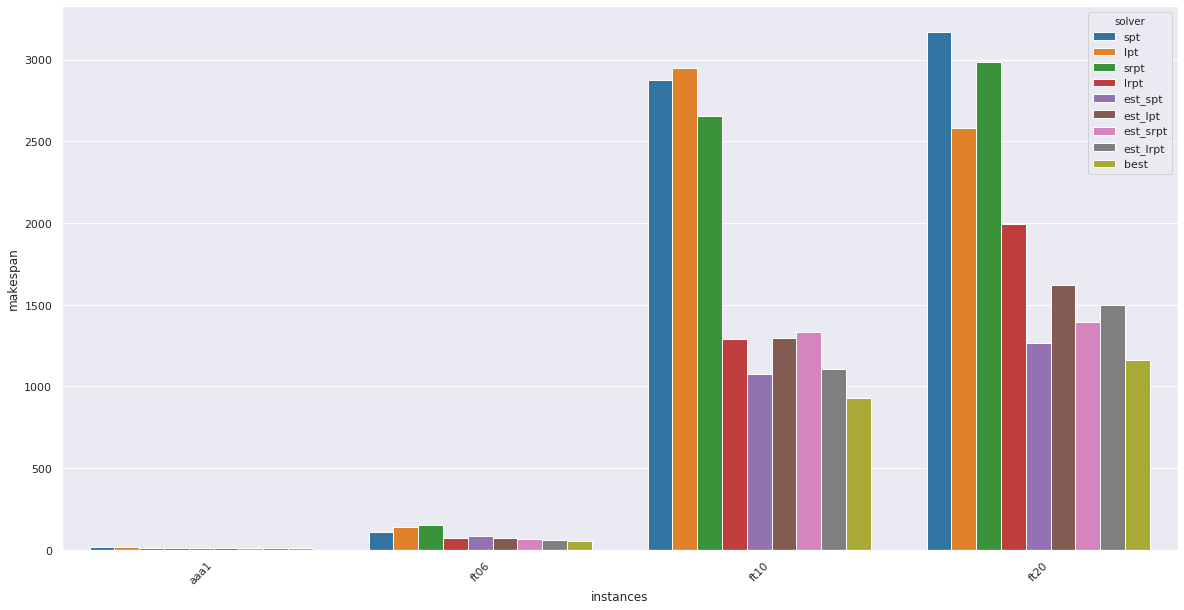

In [386]:
plt.figure(figsize=(20,10))
sns.barplot(x='instances',
            y='makespan',
            hue='solver',
            data=df[df.instances.isin(["aaa1","ft06","ft10","ft20"])],
            palette="tab10"
           )

plt.xticks(rotation=45)
plt.show()

In [ ]:
['basic', 'EST_SPT', 'EST_LRPT', 'LRPT', 'best', 'random', 'Tabou','Descent', 'SPT']

## All greedy / instances names

In [254]:
df[df.instances=="ft20"]

instances sizes  best_makespan    solver  runtimes  makespan  ecart  \
23      ft20  20x5           1165   EST_SPT         0      1844   58.3   
22      ft20  20x5           1165  EST_LRPT         0      1844   58.3   
21      ft20  20x5           1165      LRPT         0      1844   58.3   
2       ft20  20x5           1165      best         0      1165    0.0   
19      ft20  20x5           1165    random       999      1529   31.2   
18      ft20  20x5           1165     Tabou        30      1616   38.7   
16      ft20  20x5           1165     basic         0      1672   43.5   
17      ft20  20x5           1165   Descent         1      1717   47.4   
20      ft20  20x5           1165       SPT         0      1844   58.3   

    taille_instance  
23              100  
22              100  
21              100  
2               100  
19              100  
18              100  
16              100  
17              100  
20              100

In [252]:
toto

instances  sizes  best_makespan    solver  runtimes  makespan  ecart  \
7        ft06    6x6             55   EST_SPT         0        63   14.5   
6        ft06    6x6             55  EST_LRPT         0        63   14.5   
5        ft06    6x6             55      LRPT         0        63   14.5   
4        ft06    6x6             55       SPT         0        63   14.5   
12       ft10  10x10            930       SPT         0      1259   35.4   
13       ft10  10x10            930      LRPT         0      1259   35.4   
14       ft10  10x10            930  EST_LRPT         0      1259   35.4   
15       ft10  10x10            930   EST_SPT         0      1259   35.4   
23       ft20   20x5           1165   EST_SPT         0      1844   58.3   
22       ft20   20x5           1165  EST_LRPT         0      1844   58.3   
21       ft20   20x5           1165      LRPT         0      1844   58.3   
20       ft20   20x5           1165       SPT         0      1844   58.3   
28       la01   10x5            666       SPT         0       785   17.9   
29       la01   10x5            666      LRPT         0       785   17.9   
30       la01   10x5            666  EST_LRPT         0       785   17.9   
31       la01   10x5            666   EST_SPT         0       785   17.9   
39       la02   10x5            655   EST_SPT         0       977   49.2   
37       la02   10x5            655      LRPT         1       977   49.2   
36       la02   10x5            655       SPT         0       977   49.2   
38       la02   10x5            655  EST_LRPT         0       977   49.2   
47       la03   10x5            597   EST_SPT         0       819   37.2   
45       la03   10x5            597      LRPT         0       819   37.2   
44       la03   10x5            597       SPT         0       819   37.2   
46       la03   10x5            597  EST_LRPT         0       819   37.2   
52       la04   10x5            590       SPT         0       789   33.7   
53       la04   10x5            590      LRPT         0       789   33.7   
54       la04   10x5            590  EST_LRPT         0       789   33.7   
55       la04   10x5            590   EST_SPT         0       789   33.7   
61       la05   10x5            593      LRPT         0       671   13.2   
63       la05   10x5            593   EST_SPT         0       671   13.2   
..        ...    ...            ...       ...       ...       ...    ...   
287      la33  30x10           1719   EST_SPT         0      2366   37.6   
285      la33  30x10           1719      LRPT         0      2366   37.6   
292      la34  30x10           1721       SPT         0      2349   36.5   
293      la34  30x10           1721      LRPT         0      2349   36.5   
294      la34  30x10           1721  EST_LRPT         0      2349   36.5   
295      la34  30x10           1721   EST_SPT         0      2349   36.5   
302      la35  30x10           1888  EST_LRPT         0      2841   50.5   
300      la35  30x10           1888       SPT         0      2841   50.5   
301      la35  30x10           1888      LRPT         0      2841   50.5   
303      la35  30x10           1888   EST_SPT         0      2841   50.5   
310      la36  15x15           1268  EST_LRPT         0      1785   40.8   
308      la36  15x15           1268       SPT         0      1785   40.8   
309      la36  15x15           1268      LRPT         0      1785   40.8   
311      la36  15x15           1268   EST_SPT         0      1785   40.8   
318      la37  15x15           1397  EST_LRPT         0      2182   56.2   
316      la37  15x15           1397       SPT         0      2182   56.2   
319      la37  15x15           1397   EST_SPT         0      2182   56.2   
317      la37  15x15           1397      LRPT         0      2182   56.2   
324      la38  15x15           1196       SPT         0      1825   52.6   
325      la38  15x15           1196      LRPT         0      1825   52.6   
327      la38  15x15           1196   EST_SPT       

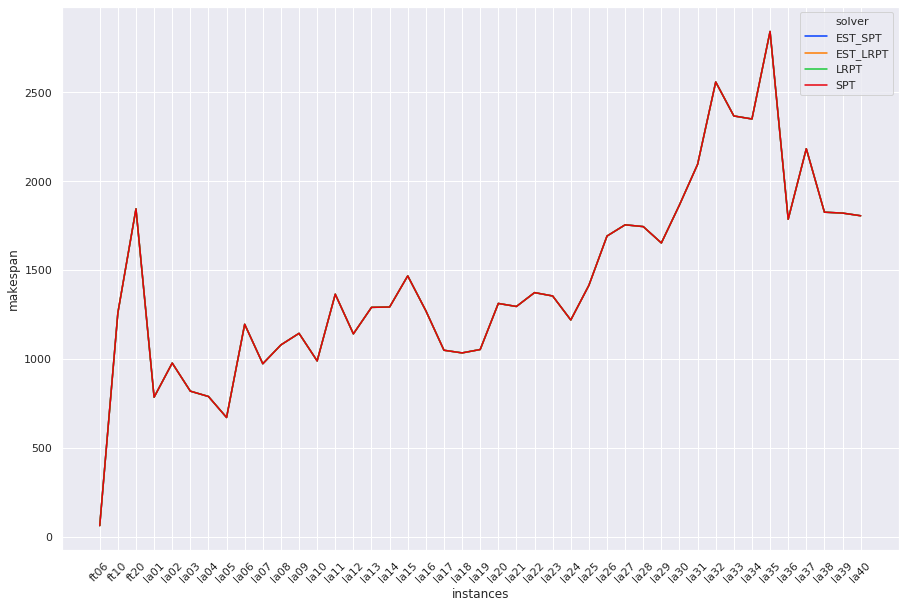

In [329]:
greedy=['EST_SPT', 'EST_LRPT', 'LRPT', 'SPT']
toto=df[df.solver.isin(greedy)]

# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=toto,hue="solver",palette="bright")
plt.xticks(rotation=45)
# plt.yscale("log")
plt.show()


In [243]:
toto[toto.instances=="ft20"]

instances sizes  best_makespan    solver  runtimes  makespan  ecart  \
21      ft20  20x5           1165      LRPT         0      1844   58.3   
22      ft20  20x5           1165  EST_LRPT         0      1844   58.3   
20      ft20  20x5           1165       SPT         0      1844   58.3   
23      ft20  20x5           1165   EST_SPT         0      1844   58.3   

    taille_instance  
21              100  
22              100  
20              100  
23              100

## All Descente / instances names

## Taboo + best descent / instances names

## Best solver / instances names

## SPT glouton SPT descente / instances names

## LRPT glouton LRPT descente / instances names

## EST_LRPT glouton EST_LRPT descente / instances names

## EST_SPT glouton EST_SPT descente / instances names

## All solver / instances names

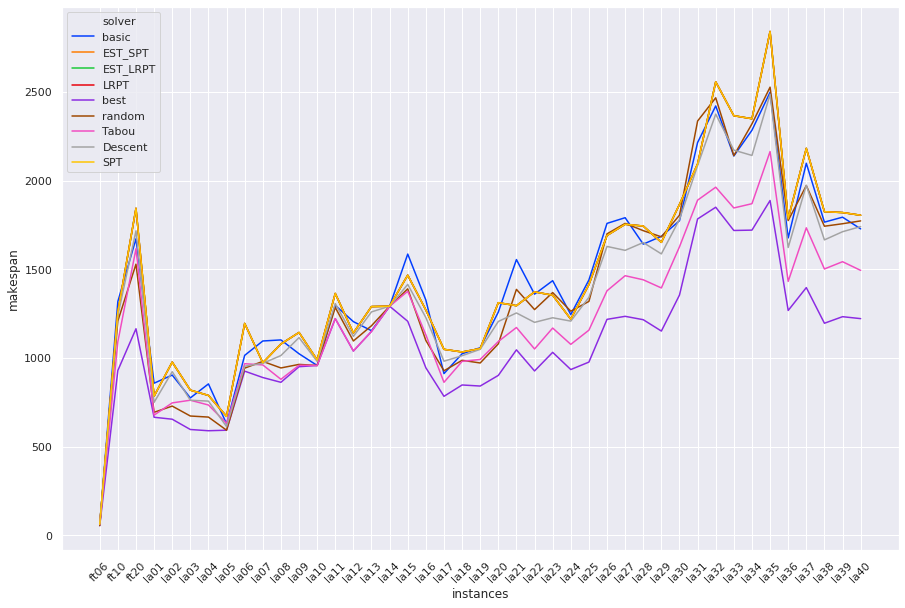

In [223]:
# df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="instances",y="makespan",data=df,hue="solver",palette="bright")
# sns.lineplot(x="instances",y="best_makespan",data=df)
plt.xticks(rotation=45)
plt.show()
# plt.scatter(df.instances,df.makespan)

## All solver / instances sizes

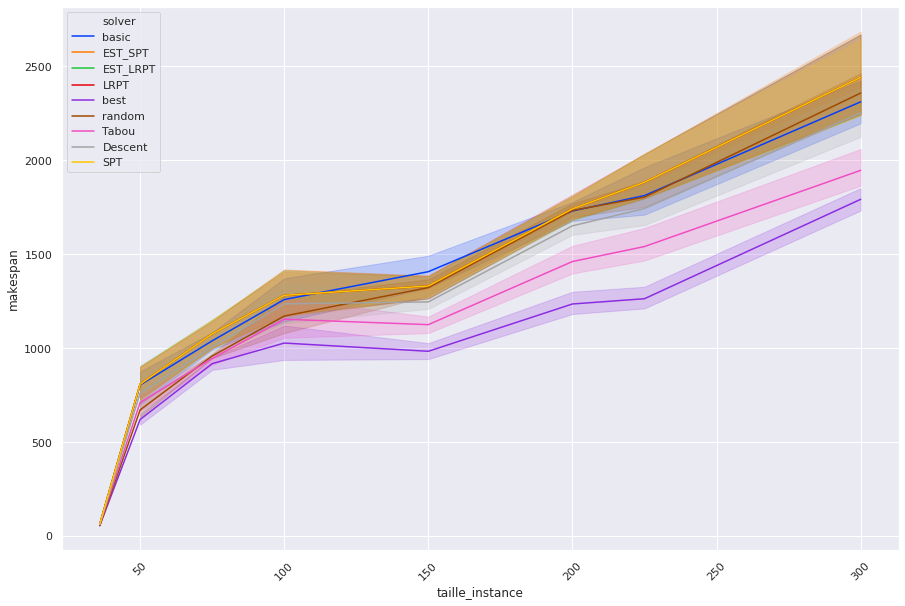

In [226]:
df=df.sort_values("taille_instance")
sns.set(font_scale=1)
plt.figure(figsize=(15,10))
sns.lineplot(x="taille_instance",y="makespan",data=df,hue="solver",palette="bright")
# sns.lineplot(x="instances",y="best_makespan",data=df)
plt.xticks(rotation=45)
plt.show()
# plt.scatter(df.instances,df.makespan)